### Import the required packages

In [134]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Import scikit-learn modules

In [135]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

#### Themes and settings

In [136]:
sns.set_theme(style='ticks', palette='deep')

In [137]:
pd.options.display.float_format = '{:.2f}'.format

#### Load and inspect the data

In [138]:
data = pd.read_csv('C:\\Users\\JohnMarquess\\OneDrive - John Marquess\\Projects\\IFN509\\Assignment 2\\data\\D2.csv', low_memory=False)

In [139]:
data

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,insulin,change,diabetesMed,readmitted
0,AfricanAmerican,Female,[80-90),1,3,7,1,Invalid,33,0,...,No,No,No,No,No,No,Steady,False,True,1
1,Caucasian,Female,[70-80),1,3,5,3,Invalid,48,2,...,No,No,No,No,No,No,Steady,False,True,1
2,Caucasian,Female,[50-60),3,1,1,3,Orthopedics,25,1,...,No,No,No,No,No,No,Steady,False,True,0
3,AfricanAmerican,Female,[50-60),1,1,7,6,Invalid,41,0,...,No,No,No,No,No,No,Steady,False,True,1
4,AfricanAmerican,Male,[80-90),1,3,7,4,Invalid,22,0,...,No,No,No,No,No,No,Steady,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,AfricanAmerican,Male,[70-80),2,1,1,4,Oncology,51,0,...,No,No,No,No,Steady,No,Steady,True,True,1
19996,Caucasian,Male,[50-60),1,3,7,9,Invalid,57,2,...,No,No,No,No,No,No,No,False,False,1
19997,Caucasian,Male,[80-90),1,6,7,3,Invalid,41,0,...,No,Steady,No,No,No,No,Steady,True,True,1
19998,Hispanic,Male,[50-60),1,6,7,3,Cardiology,49,0,...,No,No,No,No,No,No,Steady,False,True,1


#### Create a function to convert all object columns to 'string' type

This function converts all object columns to string type. 

In [140]:
def convert_object_to_string(df):
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype('string')
    return df


d1 = convert_object_to_string(data)

In [141]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      20000 non-null  string
 1   gender                    20000 non-null  string
 2   age                       20000 non-null  string
 3   admission_type_id         20000 non-null  int64 
 4   discharge_disposition_id  20000 non-null  int64 
 5   admission_source_id       20000 non-null  int64 
 6   time_in_hospital          20000 non-null  int64 
 7   medical_specialty         20000 non-null  string
 8   num_lab_procedures        20000 non-null  int64 
 9   num_procedures            20000 non-null  int64 
 10  num_medications           20000 non-null  int64 
 11  number_outpatient         20000 non-null  int64 
 12  number_emergency          20000 non-null  int64 
 13  number_inpatient          20000 non-null  int64 
 14  number_diagnoses      

#### Inspect all variables in the dataset using the value_counts() method

In [142]:
d1.race.value_counts(dropna=False)

race
Caucasian          16013
AfricanAmerican     3130
Hispanic             359
Other                349
Asian                149
Name: count, dtype: Int64

In [143]:
d1.gender.value_counts(dropna=False)

gender
Female    10774
Male       9226
Name: count, dtype: Int64

In [144]:
d1.age.value_counts(dropna=False)

age
[70-80)     5043
[60-70)     4404
[80-90)     3847
[50-60)     3253
[40-50)     1775
[30-40)      678
[90-100)     566
[20-30)      344
[10-20)       81
[0-10)         9
Name: count, dtype: Int64

In [145]:
d1.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'insulin', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [146]:
# Use sort_index() to sort the values by the index, not by frequency

d1.time_in_hospital.value_counts(dropna=False).sort_index()

time_in_hospital
1     2896
2     3449
3     3705
4     2796
5     1958
6     1446
7     1157
8      768
9      521
10     388
11     337
12     218
13     213
14     148
Name: count, dtype: int64

In [147]:
d1.medical_specialty.value_counts(dropna=False)

medical_specialty
Invalid                              12340
Emergency/Trauma                      2177
InternalMedicine                      1514
Family/GeneralPractice                 753
Cardiology                             657
Surgery-General                        533
Radiologist                            408
Orthopedics                            271
Nephrology                             180
Surgery-Vascular                       133
Gastroenterology                       129
Orthopedics-Reconstructive             116
Psychiatry                              88
Pulmonology                             83
Urology                                 82
ObstetricsandGynecology                 73
Oncology                                49
Neurology                               45
Surgery-Cardiovascular/Thoracic         40
Podiatry                                36
Surgery-Cardiovascular                  31
Surgery-Neuro                           28
Hematology                          

In [148]:
d1.num_lab_procedures.value_counts(dropna=False).sort_index()

num_lab_procedures
1      731
2      250
3      158
4      109
5       69
      ... 
103      1
108      1
109      1
111      1
118      1
Name: count, Length: 107, dtype: int64

In [149]:
d1.num_procedures.value_counts(dropna=False).sort_index()

num_procedures
0    9445
1    4048
2    2424
3    1720
4     854
5     444
6    1065
Name: count, dtype: int64

In [150]:
d1.num_medications.value_counts(dropna=False).sort_index()

num_medications
1      39
2      79
3     166
4     216
5     343
     ... 
65      1
66      1
67      1
68      1
72      1
Name: count, Length: 69, dtype: int64

In [151]:
d1.number_outpatient.value_counts(dropna=False)

number_outpatient
0     15696
1      2081
2       970
3       538
4       291
5       126
6        91
7        57
8        31
9        24
10       20
11       14
13       12
14       11
12       10
15        6
24        3
16        2
17        2
27        2
20        2
19        2
22        2
26        1
29        1
42        1
36        1
25        1
37        1
18        1
Name: count, dtype: int64

In [152]:
d1.number_emergency.value_counts(dropna=False)

number_emergency
0     17052
1      1921
2       559
3       200
4       107
5        54
6        26
7        14
10       13
8        11
11       11
9         7
13        5
18        4
20        2
12        2
15        2
19        2
22        1
76        1
24        1
21        1
29        1
37        1
14        1
64        1
Name: count, dtype: int64

In [153]:
d1.number_inpatient.value_counts(dropna=False)

number_inpatient
0     12825
1      3979
2      1627
3       759
4       338
5       185
6       102
7        65
8        40
9        28
11       18
10       16
12       10
14        2
15        2
13        2
19        1
16        1
Name: count, dtype: int64

The number of inpatient, outpatient, and emergency visits should all be integer variables. However, the '?' values in the dataset are causing them to be read as the string type. This can be fixed by converting them to the 'Int64' type.

In [154]:
d1.A1Cresult.value_counts(dropna=False, normalize=True)

A1Cresult
<NA>   0.82
>8     0.07
Norm   0.06
>7     0.04
Name: proportion, dtype: Float64

In [155]:
d1.max_glu_serum.value_counts(dropna=False, normalize=True)

max_glu_serum
<NA>   0.99
>300   0.01
Norm   0.00
>200   0.00
Name: proportion, dtype: Float64

The diagnosis categories have many granular values. These should be recoded into broader categories for analysis. This will be done in a later step.

In [156]:
d1.number_diagnoses.value_counts(dropna=False).sort_index()

number_diagnoses
1        15
2       102
3       314
4       696
5      1231
6      1621
7      1815
8      1867
9     12293
10        6
11        5
12        6
13        6
14        2
15        4
16       17
Name: count, dtype: int64

In [157]:
d1.max_glu_serum.value_counts(dropna=False)

max_glu_serum
<NA>    19748
>300      126
Norm       86
>200       40
Name: count, dtype: Int64

In [158]:
d1.A1Cresult.value_counts(dropna=False)

A1Cresult
<NA>    16433
>8       1461
Norm     1294
>7        812
Name: count, dtype: Int64

In [159]:
d1.metformin.value_counts(dropna=False)

metformin
No        15759
Steady     3943
Up          196
Down        102
Name: count, dtype: Int64

In [160]:
d1.repaglinide.value_counts(dropna=False)

repaglinide
No        19625
Steady      340
Up           30
Down          5
Name: count, dtype: Int64

In [161]:
d1.nateglinide.value_counts(dropna=False)

nateglinide
No        19833
Steady      157
Up            5
Down          5
Name: count, dtype: Int64

In [162]:
d1.chlorpropamide.value_counts(dropna=False)

chlorpropamide
No        19994
Steady        6
Name: count, dtype: Int64

In [163]:
d1.glimepiride.value_counts(dropna=False)

glimepiride
No        18857
Steady     1049
Up           62
Down         32
Name: count, dtype: Int64

In [164]:
d1.acetohexamide.value_counts(dropna=False)

acetohexamide
No    20000
Name: count, dtype: Int64

In [165]:
d1.glipizide.value_counts(dropna=False)

glipizide
No        17553
Steady     2215
Up          132
Down        100
Name: count, dtype: Int64

In [166]:
d1.glyburide.value_counts(dropna=False)

glyburide
No        18271
Steady     1534
Up          116
Down         79
Name: count, dtype: Int64

In [167]:
d1.tolbutamide.value_counts(dropna=False)

tolbutamide
No    20000
Name: count, dtype: Int64

In [168]:
d1.insulin.value_counts(dropna=False)

insulin
No        8415
Steady    5728
Down      2931
Up        2926
Name: count, dtype: Int64

Tolbutamide and acetohexamide have not been prescibed. These can be dropped from the dataset.

In [169]:
d1.change.value_counts(dropna=False)

change
True     10259
False     9741
Name: count, dtype: int64

In [170]:
d1.diabetesMed.value_counts(dropna=False)

diabetesMed
True     15764
False     4236
Name: count, dtype: int64

In [171]:
d1.readmitted.value_counts(dropna=False)

readmitted
0    10677
1     9323
Name: count, dtype: int64

### Task 2 - Data exploration

- Fix the missing values identified in the previous task
- Split the numerical data into three groups representing different aspects of the patient's visit history, procedures/medications, and diagnosys/lenght of stay:
- Make histograms and boxplots of the numerical variables
- Calculate the percentages the frequency of the variables in each group
- Comment on the distribution and skewness of the variables


#### Replace the '?' values in the numeric columns with 'NaN'

In [172]:
d1['number_inpatient'] = d1['number_inpatient'].replace('?', np.nan).astype('Int64')
d1['number_outpatient'] = d1['number_outpatient'].replace('?', np.nan).astype('Int64')
d1['number_emergency'] = d1['number_emergency'].replace('?', np.nan).astype('Int64')



#### Group 1 variables

These relate to the number of visits the patient has had in the year preceding the encounter. 

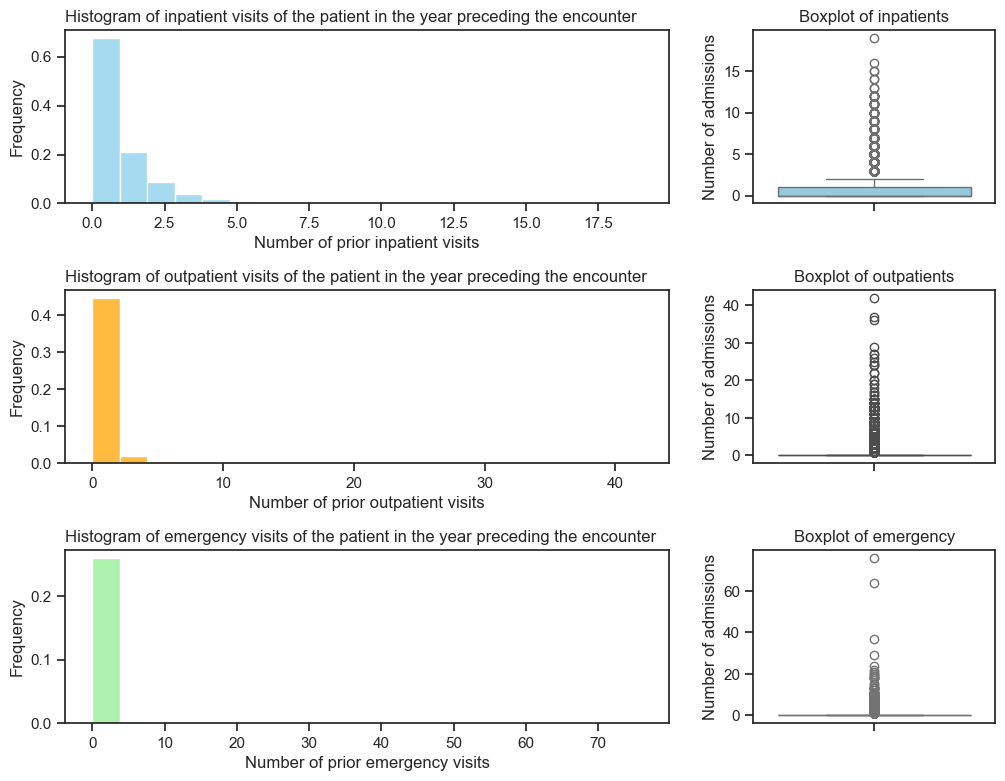

In [173]:
# Set up the figure and axes in a 3 row by 2 column grid. Histograms will be on the left and boxplots on the right
# Set the width ratio of the two columns as 2.5 and 1 to make the histogram wider than the boxplot
fig, axes = plt.subplots(3, 2, figsize=(12, 9), gridspec_kw={'width_ratios': [2.5, 1]})

# Histogram and boxplot of the number of inpatient visits 
sns.histplot(data=d1['number_inpatient'], ax=axes[0, 0], bins=20, color='skyblue', stat='density')
axes[0, 0].set_title(f'Histogram of inpatient visits of the patient in the year preceding the encounter', loc='left')
axes[0, 0].set_xlabel('Number of prior inpatient visits')
axes[0, 0].set_ylabel('Frequency')

sns.boxplot(data=d1['number_inpatient'], ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title(f'Boxplot of inpatients')
axes[0, 1].set_ylabel('Number of admissions')

# Histogram and boxplot of the number of outpatient visits
sns.histplot(data=d1['number_outpatient'], ax=axes[1, 0], bins=20, color='orange', stat='density')
axes[1, 0].set_title(f'Histogram of outpatient visits of the patient in the year preceding the encounter', loc='left')
axes[1, 0].set_xlabel('Number of prior outpatient visits')
axes[1, 0].set_ylabel('Frequency')

sns.boxplot(data=d1['number_outpatient'], ax=axes[1, 1], color='orange')
axes[1, 1].set_title(f'Boxplot of outpatients')
axes[1, 1].set_ylabel('Number of admissions')

# Histogram and boxplot of the number of emergency visits
sns.histplot(data=d1['number_emergency'], ax=axes[2, 0], bins=20, color='lightgreen', stat='density')
axes[2, 0].set_title(f'Histogram of emergency visits of the patient in the year preceding the encounter', loc='left')
axes[2, 0].set_xlabel('Number of prior emergency visits')
axes[2, 0].set_ylabel('Frequency')

sns.boxplot(data=d1['number_emergency'], ax=axes[2, 1], color='lightgreen')
axes[2, 1].set_title(f'Boxplot of emergency')
axes[2, 1].set_ylabel('Number of admissions')

# Add space between the plots to prevent overlap of titles and labels
plt.subplots_adjust(hspace=0.5)


In [174]:
group1_stats = d1[['number_inpatient', 'number_outpatient', 'number_emergency']].describe()

In [175]:
group1_stats

,number_inpatient,number_outpatient,number_emergency
count,20000.00,20000.00,20000.00
mean,0.70,0.51,0.28
std,1.35,1.54,1.25
min,0.00,0.00,0.00
25%,0.00,0.00,0.00
50%,0.00,0.00,0.00
75%,1.00,0.00,0.00
max,19.00,42.00,76.00


The histograms show that the number of inpatient, outpatient, and emergency visits are right-skewed, with most patients having few visits. The boxplots show that there are many outliers in each of the variables. This is expected given the right-skewed distribution of the data.

This can be corroborated by calculating the skewness of the variables.

In [176]:
group1_stats.loc['skew'] = d1[['number_inpatient', 'number_outpatient', 'number_emergency']].skew()

In [177]:
group1_stats.loc['skew'].to_frame()

,skew
number_inpatient,3.47
number_outpatient,7.78
number_emergency,24.01


The skewness values are positive, confirming that the data is right-skewed which is consistent with the histograms and boxplots.

The outliers can be detected using the Interquartile Range (IQR) method. This method defines an outlier as a value that is below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR. The percentage of outliers can be calculated as the number of outliers divided by the total number of observations in the column. This function detects outliers in a single column of a DataFrame using this method.

In [178]:
def detect_outliers_in_column(column):
    """
    Detects outliers in a single column of a DataFrame using the IQR method based on .describe() output.

    """
    # Use .describe() to get summary statistics
    desc = column.describe()

    # Calculate IQR
    Q1 = desc['25%']
    Q3 = desc['75%']
    IQR = Q3 - Q1

    # Determine outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    num_outliers = ((column < lower_bound) | (column > upper_bound)).sum()
    percentage_outliers = (num_outliers / column.shape[0]) * 100

    # Create a DataFrame with the results
    outlier_stats_df = pd.DataFrame({
        'Number of Outliers': [num_outliers],
        'Percentage of Outliers': [percentage_outliers]
    }, index=[column.name])

    return outlier_stats_df


In [179]:
# Apply the function to the number_inpatient column
inpatient = detect_outliers_in_column(d1['number_inpatient'])
outpatient = detect_outliers_in_column(d1['number_outpatient'])
emergency = detect_outliers_in_column(d1['number_emergency'])

# Concatenate the results into a single DataFrame
group1_outliers = pd.concat([inpatient, outpatient, emergency])
group1_outliers

,Number of Outliers,Percentage of Outliers
number_inpatient,1569,7.85
number_outpatient,4304,21.52
number_emergency,2948,14.74


In [180]:
d1['number_inpatient'].value_counts(dropna=False)

number_inpatient
0     12825
1      3979
2      1627
3       759
4       338
5       185
6       102
7        65
8        40
9        28
11       18
10       16
12       10
14        2
15        2
13        2
19        1
16        1
Name: count, dtype: Int64

In [181]:
# calculate the percentages of each of the variables. These can be grouped into a table as they all have similar distributions
inpatient_percentage = d1['number_inpatient'].value_counts(normalize=True, dropna='False').rename('Inpatients %') * 100
outpatient_percentage = d1['number_outpatient'].value_counts(normalize=True, dropna='False').rename(
    'Outpatients %') * 100
emergency_percentage = d1['number_emergency'].value_counts(normalize=True, dropna='False').rename('Emergency %') * 100

# Combine them into one df
group1_percentages_table = pd.concat([inpatient_percentage, outpatient_percentage, emergency_percentage], axis=1)

# Give the axis a meaningful name
group1_percentages_table.index.name = 'Number of visits'
group1_percentages_table

,Inpatients %,Outpatients %,Emergency %
Number of visits,,,
0,64.12,78.48,85.26
1,19.89,10.41,9.61
2,8.13,4.85,2.79
3,3.79,2.69,1.00
4,1.69,1.46,0.53
5,0.92,0.63,0.27
6,0.51,0.46,0.13
7,0.33,0.29,0.07
8,0.20,0.15,0.06


#### Group 2 variables

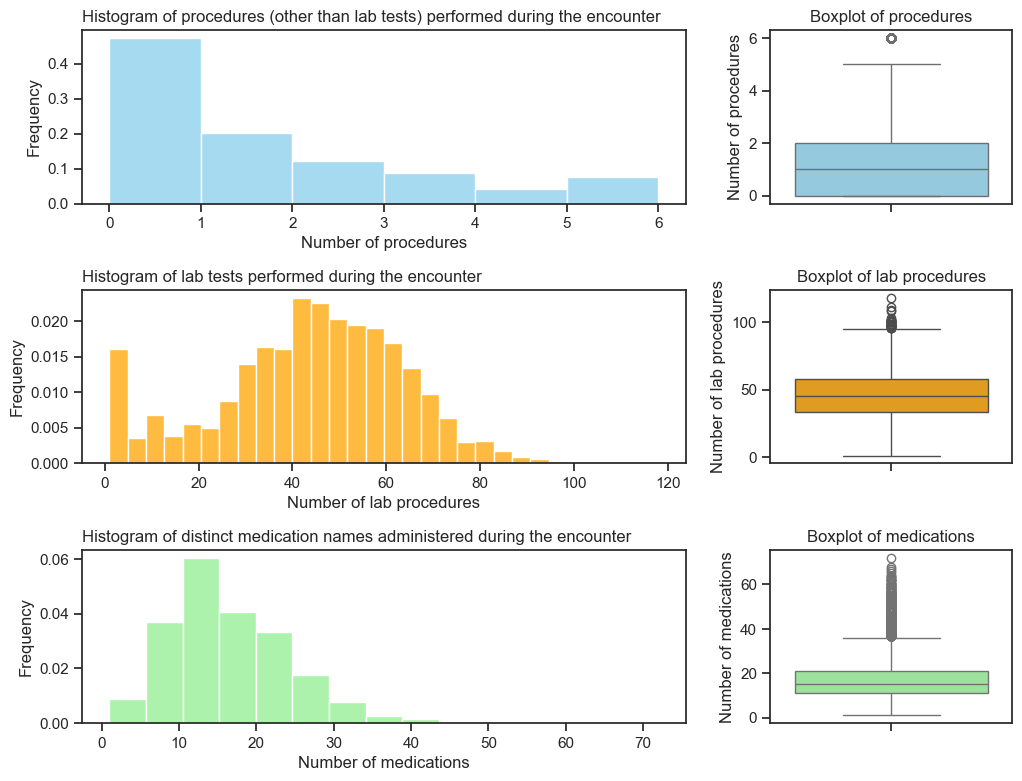

In [182]:
# Set up the figure and axes in a 3 rows, 2 columns grid, as was used for the group 1 variables

fig, axes = plt.subplots(3, 2, figsize=(12, 9), gridspec_kw={'width_ratios': [2.5, 1]})

# Histogram and boxplot of the number of procedures
sns.histplot(data=d1['num_procedures'], ax=axes[0, 0], bins=6, color='skyblue', stat='density')
axes[0, 0].set_title('Histogram of procedures (other than lab tests) performed during the encounter', loc='left')
axes[0, 0].set_xlabel('Number of procedures')
axes[0, 0].set_ylabel('Frequency')

# Boxplot of the number of procedures
sns.boxplot(data=d1['num_procedures'], ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title(f'Boxplot of procedures')
axes[0, 1].set_ylabel('Number of procedures')

# Histogram and boxplot of the number of lab procedures
sns.histplot(data=d1['num_lab_procedures'], ax=axes[1, 0], bins=30, color='orange', stat='density')
axes[1, 0].set_title('Histogram of lab tests performed during the encounter', loc='left')
axes[1, 0].set_xlabel('Number of lab procedures')
axes[1, 0].set_ylabel('Frequency')

# Boxplot of the number of lab procedures
sns.boxplot(data=d1['num_lab_procedures'], ax=axes[1, 1], color='orange')
axes[1, 1].set_title(f'Boxplot of lab procedures')
axes[1, 1].set_ylabel('Number of lab procedures')

# Histogram and boxplot of the number of medications
sns.histplot(data=d1['num_medications'], ax=axes[2, 0], bins=15, color='lightgreen', stat='density')
axes[2, 0].set_title('Histogram of distinct medication names administered during the encounter', loc='left')
axes[2, 0].set_xlabel('Number of medications')
axes[2, 0].set_ylabel('Frequency')

# Boxplot of the number of medications
sns.boxplot(data=d1['num_medications'], ax=axes[2, 1], color='lightgreen')
axes[2, 1].set_title(f'Boxplot of medications')
axes[2, 1].set_ylabel('Number of medications')

# Add space between the plots to prevent overlap of titles and labels
plt.subplots_adjust(hspace=0.5)

In [183]:
group2_stats = d1[['num_procedures', 'num_lab_procedures', 'num_medications']].describe()

In [184]:
procedures = detect_outliers_in_column(d1['num_procedures'])
lab_procedures = detect_outliers_in_column(d1['num_lab_procedures'])
medications = detect_outliers_in_column(d1['num_medications'])

# Concatenate the results into a single DataFrame
group2_outliers = pd.concat([procedures, lab_procedures, medications])
group2_outliers

,Number of Outliers,Percentage of Outliers
num_procedures,1065,5.33
num_lab_procedures,36,0.18
num_medications,418,2.09


In [185]:
group2_stats

,num_procedures,num_lab_procedures,num_medications
count,20000.00,20000.00,20000.00
mean,1.30,43.74,16.70
std,1.71,19.95,8.05
min,0.00,1.00,1.00
25%,0.00,33.00,11.00
50%,1.00,45.00,15.00
75%,2.00,58.00,21.00
max,6.00,118.00,72.00


In [186]:
group2_stats.loc['skew'] = d1[['num_procedures', 'num_lab_procedures', 'num_medications']].skew()

In [187]:
group2_stats.loc['skew']

num_procedures        1.38
num_lab_procedures   -0.34
num_medications       1.17
Name: skew, dtype: float64

The histograms show that the number of procedures and medications are positively skewed. With a smaller number of patients having large numbers of proceduresand medications.

The number of lab procedures is more evenly interesting because it shows what appears to be a long tail, in the presence of a large number of zero values. The skewness variable indicates that this variable is in fact slightly negatively skewed.

The boxplots show that there are many outliers in each of the variables. This needs to be interpreted in the context of the data. For example, the number of procedures and medications, while exceeding the IQR, may not be considered outliers in a medical context. 

Also, the number of outliers in the lab procedures is comparatively low, but this is due to the large number of zero values in the data. This is likely due to the fact that not all patients require lab procedures during their encounter.

#### Group 3 variables


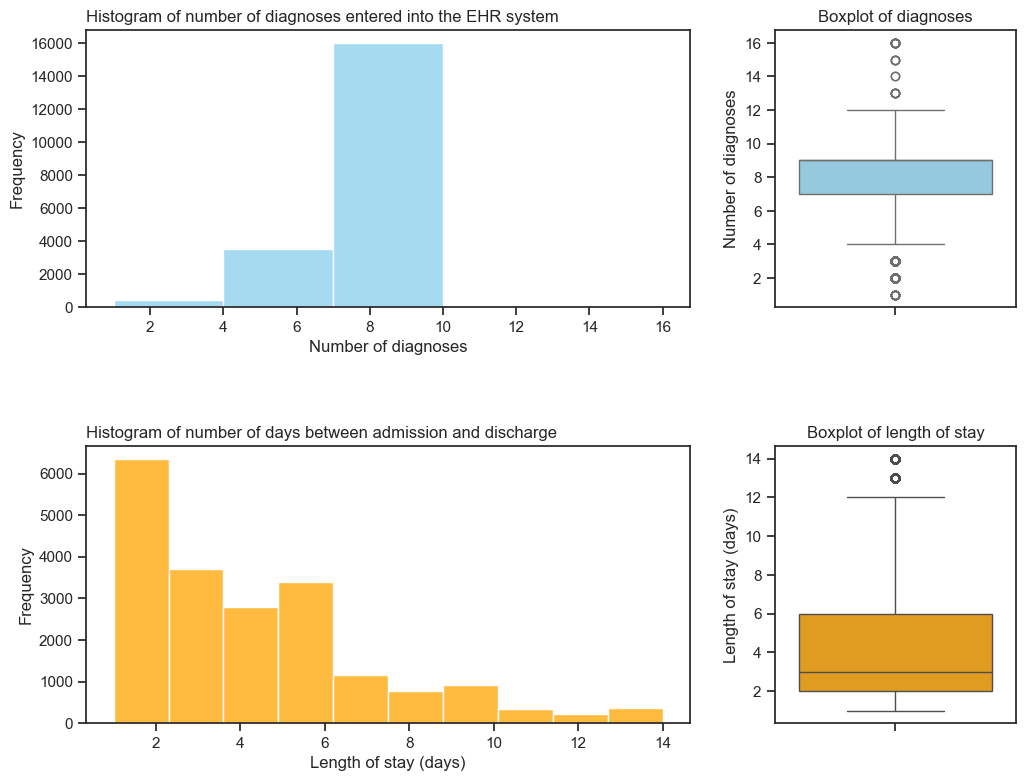

In [188]:
# Set up the figure and axes in a 2 rows, 2 columns grid. Histograms will be on the left and boxplots on the right
fig, axes = plt.subplots(2, 2, figsize=(12, 9), gridspec_kw={'width_ratios': [2.5, 1]})

# Histogram and boxplot of the number of diagnoses
sns.histplot(data=d1['number_diagnoses'], ax=axes[0, 0], bins=5, color='skyblue')
axes[0, 0].set_title('Histogram of number of diagnoses entered into the EHR system', loc='left')
axes[0, 0].set_xlabel('Number of diagnoses')
axes[0, 0].set_ylabel('Frequency')

# Boxplot of the number of diagnoses
sns.boxplot(data=d1['number_diagnoses'], ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title(f'Boxplot of diagnoses')
axes[0, 1].set_ylabel('Number of diagnoses')

# Histogram and boxplot of the length of stay
sns.histplot(data=d1['time_in_hospital'], ax=axes[1, 0], bins=10, color='orange')
axes[1, 0].set_title('Histogram of number of days between admission and discharge', loc='left')
axes[1, 0].set_xlabel('Length of stay (days)')
axes[1, 0].set_ylabel('Frequency')

# Boxplot of the length of stay
sns.boxplot(data=d1['time_in_hospital'], ax=axes[1, 1], color='orange')
axes[1, 1].set_title(f'Boxplot of length of stay')
axes[1, 1].set_ylabel('Length of stay (days)')

plt.subplots_adjust(hspace=0.5)

In [189]:
group3_stats = d1[['number_diagnoses', 'time_in_hospital']].describe()

In [190]:
diagnoses = detect_outliers_in_column(d1['number_diagnoses'])
length_of_stay = detect_outliers_in_column(d1['time_in_hospital'])

# Concatenate the results into a single DataFrame
group3_outliers = pd.concat([diagnoses, length_of_stay])
group3_outliers

,Number of Outliers,Percentage of Outliers
number_diagnoses,460,2.30
time_in_hospital,361,1.80


In [191]:
group3_stats.loc['skew'] = d1[['number_diagnoses', 'time_in_hospital']].skew()

In [192]:
group3_stats.loc['skew'].to_frame()

,skew
number_diagnoses,-1.30
time_in_hospital,1.19


The histograms show that the number of diagnoses are negatively skewed whereas the length of stay is positively skewed. The boxplots show that there are no outliers for he number of diagnoses, but there are many outliers for the length of stay.

These are corroborated by the skewness values which are negative for the number of diagnoses and positive for the length of stay.

#### Identify and show variables with missing data

Missing data are represented by '?' in the dataset. For integer values that have already been replaced with 'NaN'.  This code allows us to detect them using the isna() method for NaNs, and the isin() method to search for '?' characters in qualitative variables.


The data in the admission_type_id, discharge_disposition_id, and admission_source_id columns are coded using reference codes. The missing values are represented by codes that are not in the reference list. These codes need to be identified and mapped to the correct missing value code.

In [193]:
# Count the number of NA in each column
na_counts = d1.isna().sum()
# Count the number of '?' in each column
q_mark_counts = d1.isin(['?']).sum()

In [194]:
# Map the missing codes for the admission_type_id, discharge_disposition_id, and admission_source_id columns

# Admission_type_id missing reference codes are 'Not Available', 'NULL', 'Not Mapped', represented by 5, 6, 8
# Discharge_disposition_id missing reference codes are 'NULL', 'Not Mapped', and 'Unknown/Invalid' represented by 18, 25, 26
# Admission_source_id missing reference codes are 'Not Available', 'NULL', 'Not Mapped', represented by 9, 15, 17, 20, and 21

# counts the missing values in the columns
missing_admission_type_id = d1['admission_type_id'].isin([5, 6, 8]).sum()
missing_discharge_disposition_id = d1['discharge_disposition_id'].isin([7, 18, 25, 26]).sum()
missing_admission_source_id = d1['admission_source_id'].isin([9, 15, 17, 20, 21]).sum()

# Create a DataFrame with the results
missing_references = pd.DataFrame({
    'Missing admission_type_id': [missing_admission_type_id],
    'Missing discharge_disposition_id': [missing_discharge_disposition_id],
    'Missing admission_source_id': [missing_admission_source_id]
}).T

# Note - transposed data frame to make it the same shape as the other missing data frames

Combine into a single DataFrame and present as a nice table

In [195]:
# Combine into a single DataFrame
missing_data = pd.DataFrame({
    'NaN Count': na_counts,
    '? Count': q_mark_counts,
    'Missing references': missing_references[0]
})

# Convert all the NaNs to 0 and change the data type to integer
missing_data = missing_data.fillna(0).astype('int64')

# Calculate the total number of missing values and the percentage of missing values
missing_data['Total Missing'] = missing_data['NaN Count'] + missing_data['? Count'] + missing_data['Missing references']
missing_data['Percentage Missing'] = (missing_data['Total Missing'] / len(d1)) * 100
missing_data = missing_data[missing_data['Total Missing'] > 0]
# 
missing_data

,NaN Count,? Count,Missing references,Total Missing,Percentage Missing
A1Cresult,16433,0,0,16433,82.16
Missing admission_source_id,0,0,280,280,1.40
Missing admission_type_id,0,0,1084,1084,5.42
Missing discharge_disposition_id,0,0,142,142,0.71
max_glu_serum,19748,0,0,19748,98.74


#### Convert the age variable to an ordered category

Age loaded as strings with no ordering. This can be converted to ordered categories in case the ordering needs to be preserved for the modelling stage. 

Weight is also a string but there is no point ordering it as most of the data are missing and this variable will be dropped.

In [196]:
age_categories = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)',
                  '[90-100)']

In [197]:
d1['age'] = pd.Categorical(d1['age'], categories=age_categories, ordered=True)

In [198]:
d1['age'].value_counts(dropna=False).sort_index()

age
[0-10)         9
[10-20)       81
[20-30)      344
[30-40)      678
[40-50)     1775
[50-60)     3253
[60-70)     4404
[70-80)     5043
[80-90)     3847
[90-100)     566
Name: count, dtype: int64

### Fixing the missing values

The missing values will need to be corrected as follows
- The race will need to be imputed it has 2.5% missing values. This can be done by replacing the missing values with the mode of the variable
- The weight variable will be dropped as it has a large number of missing values
- The payer_code variable will be dropped as it has a large number of missing values and is unlikley to be useful in the analysis


There are a couple of options for this. Either impute based on the mode of the variable, or use a random sampling approach. All methods have their pros and cons. 
 
 Given that the missing values represent 2.5% of the data, and that the variable has an 'other' category, it is not safe to assume that the missing data are due to the absence of a category that people belong to. Therefore, reduce the chance of introducing bias by recoding based on mode imputation, the imputation will use random sampling reflecting the underlying distribution.
 
 The steps are:
 - Replace the '?' with None
 - Calculate the proportions of each value category
 - Replace the missing values with a random sample from the value categories based on the proportions by applying the lambda function to the column
 


In [199]:
# Convert the ? to None so it can be treated as a missing value
d1['race'] = d1['race'].replace('?', None)

In [200]:
race_proportions = d1.race.value_counts(normalize=True)

In [201]:
race_proportions.to_frame()

,proportion
race,
Caucasian,0.80
AfricanAmerican,0.16
Hispanic,0.02
Other,0.02
Asian,0.01


In [202]:
d1['race'] = d1['race'].apply(lambda x: np.random.choice(race_proportions.index, p=race_proportions.values) if pd.isnull(x) else x)

In [203]:
d1['race'].value_counts(dropna=False).to_frame()

,count
race,
Caucasian,16013
AfricanAmerican,3130
Hispanic,359
Other,349
Asian,149


#### Fixing missing values in the numeric columns (number_inpatient, number_outpatient, number_emergency)

The missing values in the number_inpatient, number_outpatient, and number_emergency columns were replaced with the median of the respective columns. This was done to preserve the distribution of the data and avoid introducing bias. 



In [204]:
# Replace the missing values in the numeric columns with the median
d1['number_inpatient'] = d1['number_inpatient'].fillna(d1['number_inpatient'].median())
d1['number_outpatient'] = d1['number_outpatient'].fillna(d1['number_outpatient'].median())
d1['number_emergency'] = d1['number_emergency'].fillna(d1['number_emergency'].median())


In [205]:
d1['number_outpatient'].value_counts(dropna=False).to_frame()

,count
number_outpatient,
0,15696
1,2081
2,970
3,538
4,291
5,126
6,91
7,57
8,31


#### Fixing missing values in the medical_specialty column

The medical_specialty column has a large number of missing values and a large number of distinct value categories. Therefore a different approach was taken, instead of imputation. The values were recoded into broader categories based on the text in the column to limit the amount of features created furing one-hot encoding. The categories were based on the following:
- Surgical - based on the presence of 'Surg' or 'Anesth' in the text
- Paediatric - based on the presence of 'Pedia' in the text
- General Practice - based on the presence of 'Family' in the text
- Mental Health - based on the presence of 'Psyc', 'Neur' in the text
- Orthopedic - based on the presence of 'Ortho' in the text
- OBGYN - based on the presence of 'Obs' or 'Gyn' in the text
- Internal Medicine - based on the presence of 'Internal', 'Neph', 'Urol', 'Cardi', 'nfect', 'Pulmo', 'Endoc', 'Gastro' in the text. These are related to internal medicine diciplines as they are all related to internal organ systems.
- Oncology - based on the presence of 'Hem' or 'Onc' in the text
- Emergency - based on the presence of 'Emerg' or 'Trauma' in the text
- Diagnostic - based on the presence of 'Pathol' or 'Radio' in the text
- Other - for all other values

The missing identifer '?' was replaced with 'Unknown' as it was not possible to determine the category based on the text.

The remaining values were replaced with 'Other' as they did not fit into any of the categories above.


Use `numpy.select()` to assign values to ids using conditions and choices. The conditions are defined by `str.contains()` lookups. This is a vectorized approach that is more efficient than using loops or `apply()`. 

In [206]:
# Make a copy of the medical_specialty column
specialty = d1['medical_specialty'].copy()

In [207]:
# Set the condtions
conditions = [
    specialty.str.contains('Surg|Anesth', case=False, regex=True),
    specialty.str.contains('Pedia', case=False, regex=True),
    specialty.str.contains('Family', case=False, regex=True),
    specialty.str.contains('Psyc|Neur', case=False, regex=True),
    specialty.str.contains('Ortho', case=False, regex=True),
    specialty.str.contains('Obs|Gyn', case=False, regex=True),
    specialty.str.contains('Internal|Neph|Urol|Cardi|nfect|Pulmo|Endoc|Gastro', case=False, regex=True),
    specialty.str.contains('Hem|Onc', case=False, regex=True),
    specialty.str.contains('Emerg|Trauma', case=False, regex=True),
    specialty.str.contains('Pathol|Radio', case=False, regex=True),
    specialty == '?'
]

# Set the choices
choices = ['Surgical', 'Paediatric', 'General Practice', 'Mental Health', 'Orthopedic', 'OBGYN', 'Internal Medicine',
           'Oncology', 'Emergency', 'Diagnostic', 'Unknown']

    

In [208]:
d1['medical_specialty'] = np.select(conditions, choices, default='Other')

In [209]:
d1['medical_specialty'].value_counts(dropna=False).to_frame()

,count
medical_specialty,
Other,12443
Internal Medicine,2658
Emergency,2177
Surgical,816
General Practice,753
Diagnostic,413
Orthopedic,387
Mental Health,157
OBGYN,96


#### Missing values in the diag_1, diag_2, and diag_3 columns

Similar to the medical_specialty column, the diag_1, diag_2, and diag_3 columns have missing values represented by '?'. These will be replaced with 'Unknown' as it is not possible to determine the category based on the text.

The remaining values were recoded into broader categories based on the ICD9 codes. The categories were sources from the following link: https://icd.codes/icd9cm

A function was used to conditonally assign the categories based on the ICD9 codes. The function was then applied to the diag_1, diag_2, and diag_3 columns to create new columns with the categories.

In [210]:
def categorize_diagnosis(code):
    code_str = str(code)

    # Check for specific prefixes 'V' and 'E'. These are supplementary factors
    if 'V' in code_str or 'E' in code_str:
        return 'Supplementary factors'

    # Handle the missing values
    if code_str == '?':
        return 'Unknown'

    # Convert the code to a numeric value for the lookup
    try:
        code_num = int(float(code_str))
    except ValueError:
        return 'Unknown'

    # Categorize based on the numeric value
    if 1 <= code_num <= 139:
        return 'Infectious'
    elif 140 <= code_num <= 239:
        return 'Neoplasms'
    elif 240 <= code_num <= 279:
        return 'Endocrine'
    elif 280 <= code_num <= 289:
        return 'Blood disorders'
    elif 290 <= code_num <= 319:
        return 'mental health'
    elif 320 <= code_num <= 389:
        return 'Nervous system'
    elif 390 <= code_num <= 459:
        return 'Circulatory system'
    elif 460 <= code_num <= 519:
        return 'Respiratory system'
    elif 520 <= code_num <= 579:
        return 'Digestive system'
    elif 580 <= code_num <= 629:
        return 'Genitourinary system'
    elif 630 <= code_num <= 679:
        return 'Pregnancy/Childbirth'
    elif 680 <= code_num <= 709:
        return 'Skin conditions'
    elif 710 <= code_num <= 739:
        return 'Musculoskeletal system'
    elif 740 <= code_num <= 759:
        return 'Congenital anomalies'
    elif 760 <= code_num <= 779:
        return 'Perinatal conditions'
    elif 780 <= code_num <= 799:
        return 'Ill-defined conditions'
    elif 800 <= code_num <= 999:
        return 'Injury/Poisoning'
    else:
        return 'Other'


In [211]:
# Apply the function to the 'diag_1' column in the DataFrame
d1['diag_1_icd'] = d1['diag_1'].apply(categorize_diagnosis)
d1['diag_2_icd'] = d1['diag_2'].apply(categorize_diagnosis)
d1['diag_3_icd'] = d1['diag_3'].apply(categorize_diagnosis)

KeyError: 'diag_1'

### Rationale to drop diag_2 and diag_3 variables

Closer inspection of the diag_1, diag_2, and diag_3 columns revealed that there are many values the same  in corresponding records. Given that each variable would produce 18 dummy variables each with one-hot encoding. This would result in 54 new features. This would be a large number of features to add to the dataset. That, taken intoo consideration with the duplicate values it seems sensible to focus on diag_1 only.


The unknown values in diag_1_icd will be filled with their corresponding values from diag_2_icd 

In [212]:
(d1['diag_1_icd'] == d1['diag_2_icd']).sum()

KeyError: 'diag_1_icd'

In [213]:
(d1['diag_1_icd'] == d1['diag_3_icd']).sum()

KeyError: 'diag_1_icd'

In [214]:
d1['diag_1_icd'] = d1['diag_1_icd'].fillna(d1['diag_2_icd'])

KeyError: 'diag_1_icd'

#### Missing values in the admission_type_id, discharge_disposition_id, and admission_source_id columns

The same process was applied to the admission_type_id, discharge_disposition_id, and admission_source_id columns. The variables were transformed to reduce the number of categories and therefore limit the number of features created during one-hot encoding. These variables had a broder range of missing or unknown values that need to be recoded.



The admission_type_id were condensed to fewer categories as follows:
- Emergency, urgent, and trauma center can be combined into the Emergency category based on their acuity
- Not Available, NULL, and Not Mapped can be combined into the Not available category based on the lack of mapping, or unavailability
- Newborn can be left as a separate category

The discharge_disposition_id can be condensed to four distinct categories as the cover discharged home, transferred for additional care, deceased, or unknown.
- Discharged to home can be categorised as 'Discharged home'
- Discharged/transferred to another short term hospital, SNF, ICF etc can be categorised as 'Ongong care'. This is because they are all forms of additional care in this or other facility.
- Any variable with Expired will be recoded to 'Deceased'
- All Not mapped, NULL, Unknown will be recoded to 'Unknown'

The admission_source_id can be condensed to fewer categories as follows:
- Referral
- Transfer
- Emergency
- Not Available

On inspection of the variables, there were a small number that were related to childbirth/newborns and some that were court order. Given the small number (less than 10) these were considered as a referral.



Use `numpy.select()` again to assign values to ids using conditions and choices 

In [215]:
# Set conditions based on admission_type_id
conditions = [
    d1['admission_type_id'].isin([1, 2, 7]),
    d1['admission_type_id'].isin([3,4]),
    d1['admission_type_id'].isin([5, 6, 8])
]

# Set the choices
choices = [
    'Emergency',
    'Elective',
    'Not Available'
]
d1['admission_type'] = np.select(conditions, choices, default='Not available')

In [216]:
d1['admission_type'] = np.select(conditions, choices, default='Not available')

In [217]:
# Define conditions and choices
conditions = [
    d1['discharge_disposition_id'].isin([2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 14, 15, 16, 17, 22, 23, 24, 27, 28, 29, 30]),
    d1['discharge_disposition_id'].isin([1]),
    d1['discharge_disposition_id'].isin([7, 18, 25, 26]),
    d1['discharge_disposition_id'].isin([11, 19, 20, 21])
]

choices = [
    'Additional care',
    'Discharged home',
    'Unknown',
    'Deceased'
]
d1['discharge_disposition'] = np.select(conditions, choices, default='Unknown')



In [218]:
# Apply the conditions to create the new column
d1['discharge_disposition'] = np.select(conditions, choices, default='Unknown')

In [219]:
d1['discharge_disposition'].value_counts(dropna=False)

discharge_disposition
Discharged home    11867
Additional care     7671
Deceased             320
Unknown              142
Name: count, dtype: int64

In [220]:
# Define conditions and choices
conditions = [
    d1['admission_source_id'].isin([1, 2, 3]),
    d1['admission_source_id'].isin([4, 5, 6, 10, 22, 25]),
    d1['admission_source_id'].isin([7, 8]),
    d1['admission_source_id'].isin([9, 15, 17, 20, 21])
]

choices = [
    'Referral',
    'Transfer',
    'Emergency',
    'Not Available'
]

In [221]:
# Apply the conditions to create the new column
d1['admission_source'] = np.select(conditions, choices, default='Not Available')

In [222]:
d1['admission_source'].value_counts(dropna=False).to_frame()

,count
admission_source,
Emergency,12986
Referral,6261
Transfer,473
Not Available,280


#### Other missing values

 - max_glu_serum and A1Cresult were 91% and 85% missing repsectively. These will be dropped as they are unlikely to be useful in the analysis.
 - The single missing chlorpropamide value will be replaced with 'No' as it is the most common value in the column.
 
 - The other anomaly in the data was in the gender variable. There was one value that was 'Unknown/Invalid'. This will be replaced with 'Male' as it the model value in the column.



### Task 3 - data preparation

In [223]:
d1['chlorpropamide'] = d1['chlorpropamide'].replace('?', 'No')

In [224]:
d1['gender'] = d1['gender'].replace('Unknown/Invalid', 'Female')

In [225]:
d1.number_inpatient.value_counts(dropna=False)

number_inpatient
0     12825
1      3979
2      1627
3       759
4       338
5       185
6       102
7        65
8        40
9        28
11       18
10       16
12       10
14        2
15        2
13        2
19        1
16        1
Name: count, dtype: Int64

In [226]:
d1['metformin'].value_counts(dropna=False)

metformin
No        15759
Steady     3943
Up          196
Down        102
Name: count, dtype: Int64

### Change binary categorical variables to numeric

The binary categorical variables, 'change' and 'diabetesMed', 'gender', 'readmitted', 'diabetes', 'single_day_admission' were converted to numeric variables by mapping 'No' to 0 and 'Ch' to 1. This will allow the variables to be used in the analysis and modelling stages.
 

In [227]:
# convert change to 1 and 0
d1['change'] = d1['change'].map({'No': 0, 'Ch': 1})

In [228]:
# convert diabetesMed to 1 and 0
d1['diabetesMed'] = d1['diabetesMed'].map({'No': 0, 'Yes': 1})

In [229]:
# convert gender to 1 for female and 0 for male
d1['gender'] = d1['gender'].map({'Male': 0, 'Female': 1})

In [230]:
# Convert readmitted to binary, 0 for NO else 1
d1['readmitted'] = d1['readmitted'].map({'NO': 0, '>30': 1, '<30': 1})

In [231]:
d1['diabetes'] = d1['diabetes'].map({'No': 0, 'Yes': 1})

KeyError: 'diabetes'

In [232]:
d1['single_day_admission'] = d1['single_day_admission'].map({'No': 0, 'Yes': 1})

KeyError: 'single_day_admission'

In [233]:
d1

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,glipizide,glyburide,tolbutamide,insulin,change,diabetesMed,readmitted,admission_type,discharge_disposition,admission_source
0,AfricanAmerican,1,[80-90),1,3,7,1,Other,33,0,...,No,No,No,Steady,NaN,NaN,NaN,Emergency,Additional care,Emergency
1,Caucasian,1,[70-80),1,3,5,3,Other,48,2,...,No,No,No,Steady,NaN,NaN,NaN,Emergency,Additional care,Transfer
2,Caucasian,1,[50-60),3,1,1,3,Orthopedic,25,1,...,No,No,No,Steady,NaN,NaN,NaN,Elective,Discharged home,Referral
3,AfricanAmerican,1,[50-60),1,1,7,6,Other,41,0,...,No,No,No,Steady,NaN,NaN,NaN,Emergency,Discharged home,Emergency
4,AfricanAmerican,0,[80-90),1,3,7,4,Other,22,0,...,No,No,No,Steady,NaN,NaN,NaN,Emergency,Additional care,Emergency
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,AfricanAmerican,0,[70-80),2,1,1,4,Oncology,51,0,...,No,Steady,No,Steady,NaN,NaN,NaN,Emergency,Discharged home,Referral
19996,Caucasian,0,[50-60),1,3,7,9,Other,57,2,...,No,No,No,No,NaN,NaN,NaN,Emergency,Additional care,Emergency
19997,Caucasian,0,[80-90),1,6,7,3,Other,41,0,...,No,No,No,Steady,NaN,NaN,NaN,Emergency,Additional care,Emergency
19998,Hispanic,0,[50-60),1,6,7,3,Internal Medicine,49,0,...,No,No,No,Steady,NaN,NaN,NaN,Emergency,Additional care,Emergency


#### Convert age variable to fewer levels

The age vaiariable is binned into 10 discrete groups. This will be converted to 3 groups to reduce the number of features created during one-hot encoding. The groups will be reactored and converted to an integer representation as follows:
- 0-30 representing children and younger adults, with 0 as the group
- 30-60 representing adults to middle aged+, with 1 as the group
- 60-100 representing older persons, with 2 as the group


In [234]:
# function to convert age bins

def convert_age_groups(age):
    if age in ['[0-10)', '[10-20)', '[20-30)']:
        return 0
    elif age in ['[30-40)', '[40-50)', '[50-60)']:
        return 1
    else:
        return 2


In [235]:
d1['age'] = d1['age'].apply(convert_age_groups)

In [236]:
d1['age'].value_counts(dropna=False).to_frame().sort_index()

,count
age,
0,434
1,5706
2,13860


#### The drug columns should be changed to numeric variables for future modelling.

In [237]:
# select the drug columns only
d1[['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide','glyburide','insulin']]

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,insulin
0,No,No,No,No,No,No,No,Steady
1,No,No,No,No,No,No,No,Steady
2,No,No,No,No,No,No,No,Steady
3,No,No,No,No,No,No,No,Steady
4,No,No,No,No,No,No,No,Steady
...,...,...,...,...,...,...,...,...
19995,No,No,No,No,No,No,Steady,Steady
19996,No,No,No,No,No,No,No,No
19997,No,No,No,No,Steady,No,No,Steady
19998,No,No,No,No,No,No,No,Steady


In [238]:
# Map the values to numeric values to test variance
# This will is done as a separate dataframe so that the drug mapping can be changed later to a more amenable format
drug_mapping = {'No': 0, 'Steady': 1, 'Up': 3, 'Down': 2}

def map_drug_changes_to_values(df, drug_columns):
    for col in drug_columns:
        df[col] = df[col].map(drug_mapping)
    return df

drug_columns = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
                'glimepiride', 'glipizide', 'glyburide', 'insulin']
d1_drug_changes = d1.copy(deep=True)
d1_drug_changes = map_drug_changes_to_values(d1_drug_changes, drug_columns)



In [239]:
d1_drug_changes[drug_columns].describe()

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,insulin
count,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00
mean,0.24,0.02,0.01,0.00,0.06,0.14,0.10,1.02
std,0.50,0.18,0.10,0.02,0.29,0.41,0.37,1.07
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
max,3.00,3.00,3.00,1.00,3.00,3.00,3.00,3.00


In [240]:
np.var(d1_drug_changes[drug_columns], axis=0)

metformin        0.25
repaglinide      0.03
nateglinide      0.01
chlorpropamide   0.00
glimepiride      0.08
glipizide        0.17
glyburide        0.13
insulin          1.15
dtype: float64

#### Combine the drug columns into a single variable

- The new column, 'sum_drug_changes', will be created by summing the values of the drug columns for each patient. This will give a single variable that represents the total number of changes in medication for each patient.
- This is more meaningful than having multiple drug columns with individual change, and more quantitatiev than a binary changes column.
- The principle is that the higher the number, given none and steady sum to zero, then more amendments that will have been made to the diabetes drugs

In [241]:
# drug mapping to refactor the drug columns for the sum_drug_changes variable
# The mapping represents 0 for No drug or steady, and 1 for a change in dose (up or down)
drug_mapping = {'No': 0, 'Steady': 0, 'Up': 1, 'Down': 1}

d1 = map_drug_changes_to_values(d1, drug_columns)

In [242]:
d1['sum_drug_changes'] = d1[drug_columns].sum(axis=1)

In [243]:
d1['sum_drug_changes'].value_counts(dropna=False).astype('Int64').to_frame()

,count
sum_drug_changes,
0,13610
1,6085
2,279
3,26


#### Drop the unused variables

### Data transformations using normalization and encoding

In [244]:
from sklearn.preprocessing import MinMaxScaler

In [245]:
columns_to_normalize = ['number_outpatient', 'number_inpatient', 'number_emergency', 
                        'num_lab_procedures', 'num_procedures']

In [246]:
scaler = MinMaxScaler()

In [247]:
# Apply Min-Max Normalization
d1[columns_to_normalize] = scaler.fit_transform(d1[columns_to_normalize])

In [248]:
d1[columns_to_normalize].describe()

,number_outpatient,number_inpatient,number_emergency,num_lab_procedures,num_procedures
count,20000.00,20000.00,20000.00,20000.00,20000.00
mean,0.01,0.04,0.00,0.37,0.22
std,0.04,0.07,0.02,0.17,0.28
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.27,0.00
50%,0.00,0.00,0.00,0.38,0.17
75%,0.00,0.05,0.00,0.49,0.33
max,1.00,1.00,1.00,1.00,1.00


In [249]:
from sklearn.preprocessing import LabelEncoder

In [250]:
categorical_vars = ['race', 'medical_specialty', 'admission_type', 'discharge_disposition', 'admission_source',
                    'diag_1_icd']

In [251]:
le = LabelEncoder()
for var in categorical_vars:
    d1[var] = le.fit_transform(d1[var])

KeyError: 'diag_1_icd'

In [252]:
columns_to_drop = ['encounter_id', 'patient_nbr','max_glu_serum', 'A1Cresult', 'acetohexamide', 
                   'tolbutamide', 'payer_code', 'weight', 'diag_1', 'diag_2', 'diag_3', 'diag_2_icd', 'diag_3_icd', 
                   'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide','glimepiride', 'glipizide', 
                   'glyburide', 'insulin', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id']
d1 = d1.drop(columns_to_drop, axis=1)

KeyError: "['encounter_id', 'patient_nbr', 'payer_code', 'weight', 'diag_1', 'diag_2', 'diag_3', 'diag_2_icd', 'diag_3_icd'] not found in axis"

In [253]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      20000 non-null  int32  
 1   gender                    20000 non-null  int64  
 2   age                       20000 non-null  int64  
 3   admission_type_id         20000 non-null  int64  
 4   discharge_disposition_id  20000 non-null  int64  
 5   admission_source_id       20000 non-null  int64  
 6   time_in_hospital          20000 non-null  int64  
 7   medical_specialty         20000 non-null  int32  
 8   num_lab_procedures        20000 non-null  float64
 9   num_procedures            20000 non-null  float64
 10  num_medications           20000 non-null  int64  
 11  number_outpatient         20000 non-null  float64
 12  number_emergency          20000 non-null  float64
 13  number_inpatient          20000 non-null  float64
 14  number

### Create dummy variables

The qualitative variables were converted to dummy variables using the get_dummies() function. This will allow the variables to be used in the analysis and modelling stages.

In [254]:
# select non-object columns
correlation_vars = d1[['gender', 'age', 'length_of_stay', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'change', 'diabetesMed', 'readmitted', 'diabetes', 'single_day_admission', 'sum_drug_changes']]

KeyError: "['length_of_stay', 'diabetes', 'single_day_admission'] not in index"

In [255]:
correlation_matrix = d1.corr()

ValueError: could not convert string to float: '>300'

In [256]:
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='RdYlGn_r', linewidths=0.5)

NameError: name 'correlation_matrix' is not defined

<Figure size 1400x1000 with 0 Axes>

In [257]:
d1.readmitted.value_counts(dropna=False, normalize=True)

readmitted
NaN   1.00
Name: proportion, dtype: float64

In [258]:
d1.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'insulin', 'change', 'diabetesMed', 'readmitted', 'admission_type',
       'discharge_disposition', 'admission_source', 'sum_drug_changes'],
      dtype='object')

In [259]:
d1.to_csv('diabetes_data_cleaned.csv', index=False)